In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math,copy

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

file_path = 'boston_housing.csv'
df = pd.read_csv(file_path)

In [2]:
# 检查整个 DataFrame 是否有缺失值,如果有则检查每列有多少缺失值
print(df.isnull().any().any())  
if df.isnull().any().any():
    print(df.isnull().sum())

False


In [3]:
#数据集大小
print(df.shape)

(506, 14)


In [4]:
#查看数据集描述的信息(非空值的数量,平均值,方差,最小值,下四分位数,中位数,上四分位数,最大值)
print(df.describe())

               ZN       INDUS        CHAS         NOX          RM          GE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    11.363636   11.136779    0.069170    0.554695    6.284634   68.574901   
std     23.322453    6.860353    0.253994    0.115878    0.702617   28.148861   
min      0.000000    0.460000    0.000000    0.385000    3.561000    2.900000   
25%      0.000000    5.190000    0.000000    0.449000    5.885500   45.025000   
50%      0.000000    9.690000    0.000000    0.538000    6.208500   77.500000   
75%     12.500000   18.100000    0.000000    0.624000    6.623500   94.075000   
max    100.000000   27.740000    1.000000    0.871000    8.780000  100.000000   

              DIS         RAD         TAX     PRTATIO           B       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.795043    9.549407  408.237154   18.455534  356.674032   12.653063   
std      2.105710    8.7072

In [5]:
#查看数据
print(df.info)

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM    GE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     PRTATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396

### 查看各个特征与房价的关系

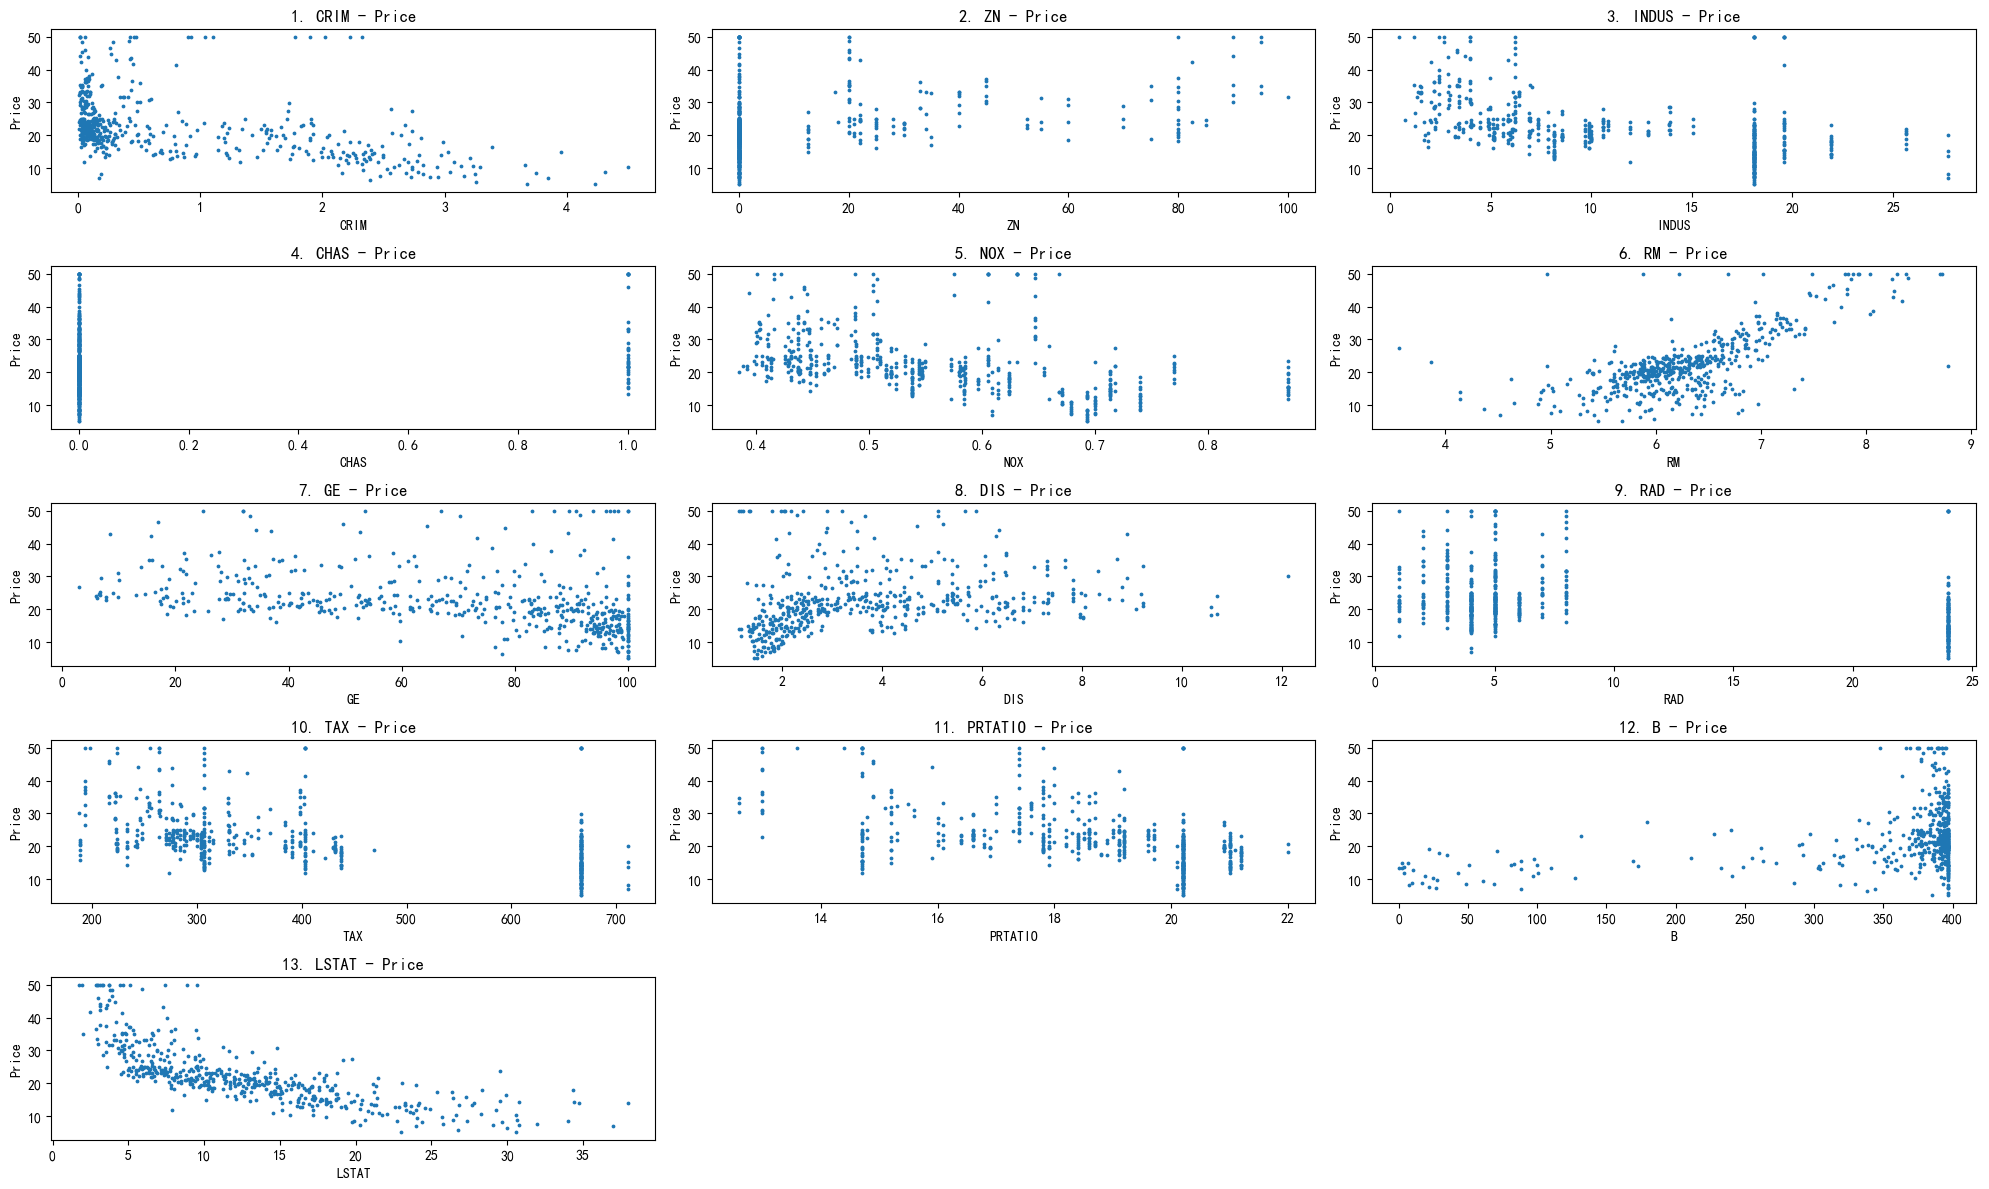

In [6]:
x_data = df[['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT']].copy() 
y_data = df[['PRICE']].copy() 
names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','GE','DIS','RAD','TAX','PRTATIO','B','LSTAT','PRICE']

# 将 CRIM 列转换为数值类型，并处理非数值数据
x_data['CRIM'] = pd.to_numeric(x_data['CRIM'], errors='coerce')

# 对 CRIM 列进行对数变换，只对正值进行变换
x_data['CRIM'] = np.log1p(x_data['CRIM'].clip(lower=0))

plt.figure(figsize=(20,12))  
for i in range(13):
    plt.subplot(5, 3, i+1)  
    plt.scatter(x_data.iloc[:, i], y_data.iloc[:, 0], s=3)   
    plt.xlabel(names[i])
    plt.ylabel('Price')
    plt.title(f'{i+1}. {names[i]} - Price')  
    
plt.tight_layout()
plt.show()

In [7]:
class Statistics:
    def __init__(self):
        pass

    def least_squares(self, x, y):
        """
        最小二乘估计法
        :param x: 输入特征
        :param y: 真实值
        :return: 权重和偏置
        """
        x_mean = np.mean(x)
        y_mean = np.mean(y)
        numerator = np.sum((x - x_mean) * (y - y_mean))
        denominator = np.sum((x - x_mean) ** 2)
        w = numerator / denominator
        b = y_mean - w * x_mean
        return w, b

    def compute_R_2(self, y, y_pred):
        """
        计算 R^2
        :param y: 真实值
        :param y_pred: 预测值
        :return: R^2 值
        """
        y_mean = np.mean(y)
        ss_tot = np.sum((y - y_mean) ** 2)
        ss_res = np.sum((y - y_pred) ** 2)
        r_squared = 1 - (ss_res / ss_tot)
        return r_squared

In [8]:
class Linear:
    def __init__(self):
        pass
    
    def compute_model_output(self, x, w, b):
        """
        计算模型输出
        :param x: 输入特征
        :param w: 权重
        :param b: 偏置
        :return: 模型输出
        """
        f_wb = w * x + b
        return f_wb

    def compute_cost(self, x, y, w, b):
        """
        计算损失函数
        :param x: 输入特征
        :param y: 真实值
        :param w: 权重
        :param b: 偏置
        :return: 损失值
        """
        m = x.shape[0]
        f_wb = self.compute_model_output(x, w, b)
        cost = (f_wb - y) ** 2
        total_cost = np.sum(cost) / (2 * m)
        return total_cost

    def compute_gradient(self, x, y, w, b):
        """
        计算梯度
        :param x: 输入特征
        :param y: 真实值
        :param w: 权重
        :param b: 偏置
        :return: 梯度值
        """
        m = x.shape[0]
        f_wb = self.compute_model_output(x, w, b)
        error = f_wb - y
        dj_dw = np.sum(error * x) / m
        dj_db = np.sum(error) / m
        return dj_dw, dj_db

    def gradient_descent(self, x, y, w_in, b_in, alpha, cost_function, gradient_function):
        """
        进行梯度下降
        :param x: 输入特征
        :param y: 真实值
        :param w_in: 初始权重
        :param b_in: 初始偏差
        :param alpha: 学习率
        :param cost_function: 损失函数
        :param gradient_function: 梯度计算函数
        :return: 最终权重和偏差
        """
        epsilon = 1.0e-8
        w = copy.deepcopy(w_in)
        b = b_in
        iterations = 0
        while True:
            dj_dw, dj_db = gradient_function(x, y, w, b)
            t1 = w - alpha * dj_dw
            t2 = b - alpha * dj_db
            if abs(t1 - w) > epsilon and abs(t2 - b) > epsilon:
                iterations += 1
                w = t1
                b = t2
            else:
                break
        print(f"迭代次数: {iterations}")
        return w, b

    def predict(self, x, w, b):
        """
        进行预测
        :param x: 输入特征
        :param w: 权重
        :param b: 偏置
        :return: 预测值
        """
        return self.compute_model_output(x, w, b)

In [9]:
linear1 = Linear()
stats1 = Statistics()

x_1 = df['RM'].values
y = df['PRICE'].values

# 梯度下降法
w_init = 0
b_init = 0
tmp_alpha = 0.045
w_final, b_final = linear1.gradient_descent(x_1, y, w_init, b_init, tmp_alpha, linear1.compute_cost, linear1.compute_gradient)
print(f"通过梯度下降找到的 w: {w_final:6.4f}; b: {b_final:8.4f}")

# 最小二乘估计法
wi, bi = stats1.least_squares(x_1, y)
print("\n")
print(f"通过最小二乘估计计算找到的 w: {wi}; b: {bi}")
y_pred = linear1.predict(x_1, wi, bi)
print(f"R^2={stats1.compute_R_2(y, y_pred)}")

# 进行预测
print("\n")
m = x_1.shape[0]
for i in range(0, m, 50):
    y_predict = linear1.predict(x_1[i], wi, bi)
    print(f"预测值:{y_predict:18}, 真实值:{y[i]:5}, 差值:{abs(y_predict - y[i]):0.4e}")

迭代次数: 23301
通过梯度下降找到的 w: 9.1021; b: -34.6705


通过最小二乘估计计算找到的 w: 9.10210898118031; b: -34.67062077643857
R^2=0.48352545599133423


预测值: 25.17574577482197, 真实值: 24.0, 差值:1.1757e+00
预测值:19.605255078339617, 真实值: 19.7, 差值:9.4745e-02
预测值:26.559266339961376, 真实值: 27.5, 差值:9.4073e-01
预测值: 21.05249040634729, 真实值: 21.5, 差值:4.4751e-01
预测值:30.272926804282946, 真实值: 32.9, 差值:2.6271e+00
预测值:  24.3747601844781, 真实值: 24.4, 差值:2.5240e-02
预测值: 27.86997003325134, 真实值: 24.8, 差值:3.0700e+00
预测值:24.402066511421644, 真实值: 22.9, 差值:1.5021e+00
预测值:19.823705693887945, 真实值:  5.6, 差值:1.4224e+01
预测值: 26.75951273754734, 真实值: 13.4, 差值:1.3360e+01
预测值: 20.18779005313516, 真实值: 16.8, 差值:3.3878e+00


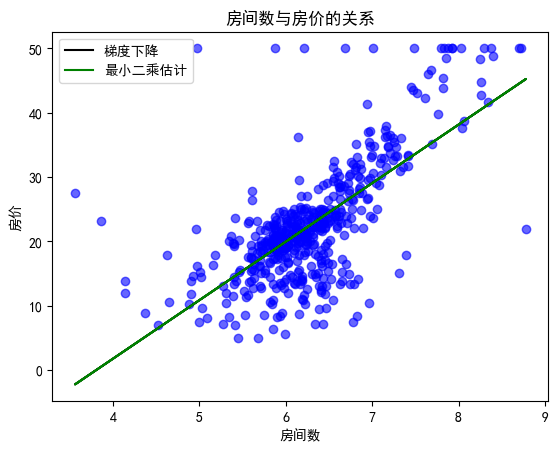

In [10]:
fig, ax = plt.subplots()
ax.scatter(x_1, y, color='blue',  alpha=0.6)
ax.plot(x_1, w_final*x_1+b_final, color='black', label='梯度下降')
ax.plot(x_1, wi*x_1+bi, color='green', label='最小二乘估计')
ax.legend()
ax.set_title('房间数与房价的关系')
ax.set_xlabel('房间数')
ax.set_ylabel('房价')
plt.show()

In [11]:
linear2 = Linear()
stats2 = Statistics()

x_2 = df['DIS'].values
y = df['PRICE'].values

# 梯度下降法
w_init = 0
b_init = 0
tmp_alpha = 0.009
w_final, b_final = linear2.gradient_descent(x_2, y, w_init, b_init, tmp_alpha, linear2.compute_cost, linear2.compute_gradient)
print(f"通过梯度下降找到的 w: {w_final:6.4f}; b: {b_final:8.4f}")

# 最小二乘估计法
wi, bi = stats2.least_squares(x_2, y)
print("\n")
print(f"通过最小二乘估计计算找到的 w: {wi}; b: {bi}")
y_pred = linear2.predict(x_2, wi, bi)
print(f"R^2={stats2.compute_R_2(y, y_pred)}")

# 进行预测
print("\n")
m = x_2.shape[0]
for i in range(0, m, 50):
    y_predict = linear2.predict(x_2[i], wi, bi)
    print(f"预测值:{y_predict:18}, 真实值:{y[i]:5}, 差值:{abs(y_predict - y[i]):0.4e}")

迭代次数: 6634
通过梯度下降找到的 w: 1.0916; b:  18.3901


通过最小二乘估计计算找到的 w: 1.0916130158411095; b: 18.390088330493384
R^2=0.062464372121782796


预测值: 22.85478556528352, 真实值: 24.0, 差值:1.1452e+00
预测值:25.829103549545792, 真实值: 19.7, 差值:6.1291e+00
预测值:21.422370965896818, 真实值: 27.5, 差值:6.0776e+00
预测值:  20.1563181901243, 真实值: 21.5, 差值:1.3437e+00
预测值:26.744639385931734, 真实值: 32.9, 差值:6.1554e+00
预测值: 26.46442232476532, 真实值: 24.4, 差值:2.0644e+00
预测值: 26.93501669589442, 真实值: 24.8, 差值:2.1350e+00
预测值:27.987659127070003, 真实值: 22.9, 差值:5.0877e+00
预测值: 20.12444309006174, 真实值:  5.6, 差值:1.4524e+01
预测值:20.926560334101787, 真实值: 13.4, 差值:7.5266e+00
预测值:21.117155966667646, 真实值: 16.8, 差值:4.3172e+00


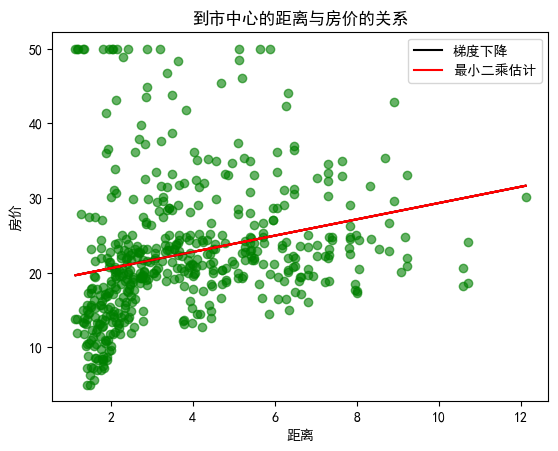

In [12]:
fig, ax = plt.subplots()
ax.scatter(x_2, y, color='green',  alpha=0.6)
ax.plot(x_2, w_final*x_2+b_final, color='black', label='梯度下降')
ax.plot(x_2, wi*x_2+bi, color='red', label='最小二乘估计')
ax.legend()
ax.set_title('到市中心的距离与房价的关系')
ax.set_xlabel('距离')
ax.set_ylabel('房价')
plt.show()

In [13]:
linear3 = Linear()
stats3 = Statistics()

x_3 = df['LSTAT'].values
y = df['PRICE'].values

# 梯度下降法
w_init = 0
b_init = 0
tmp_alpha = 0.009
w_final, b_final = linear3.gradient_descent(x_3, y, w_init, b_init, tmp_alpha, linear3.compute_cost, linear3.compute_gradient)
print(f"通过梯度下降找到的 w: {w_final:6.4f}; b: {b_final:8.4f}")

# 最小二乘估计法
wi, bi = stats3.least_squares(x_3, y)
print("\n")
print(f"通过最小二乘估计计算找到的 w: {wi}; b: {bi}")
y_pred = linear3.predict(x_3, wi, bi)
print(f"R^2={stats3.compute_R_2(y, y_pred)}")

# 进行预测
print("\n")
m = x_3.shape[0]
for i in range(0, m, 50):
    y_predict = linear3.predict(x_3[i], wi, bi)
    print(f"预测值:{y_predict:18}, 真实值:{y[i]:5}, 差值:{abs(y_predict - y[i]):0.4e}")

迭代次数: 6010
通过梯度下降找到的 w: -0.9500; b:  34.5538


通过最小二乘估计计算找到的 w: -0.9500493537579907; b: 34.5538408793831
R^2=0.5441462975864797


预测值: 29.82259509766831, 真实值: 24.0, 差值:5.8226e+00
预测值: 21.77567707133813, 真实值: 19.7, 差值:2.0757e+00
预测值: 25.60437596698283, 真实值: 27.5, 差值:1.8956e+00
预测值: 21.15814499139543, 真实值: 21.5, 差值:3.4186e-01
预测值:30.326121255160043, 真实值: 32.9, 差值:2.5739e+00
预测值:28.948549692210957, 真实值: 24.4, 差值:4.5485e+00
预测值:28.787041302072097, 真实值: 24.8, 差值:3.9870e+00
预测值: 28.87254574391032, 真实值: 22.9, 差值:5.9725e+00
预测值:  9.12101967928169, 真实值:  5.6, 差值:3.5210e+00
预测值:17.984980149843743, 真实值: 13.4, 差值:4.5850e+00
预测值:20.939633640031097, 真实值: 16.8, 差值:4.1396e+00


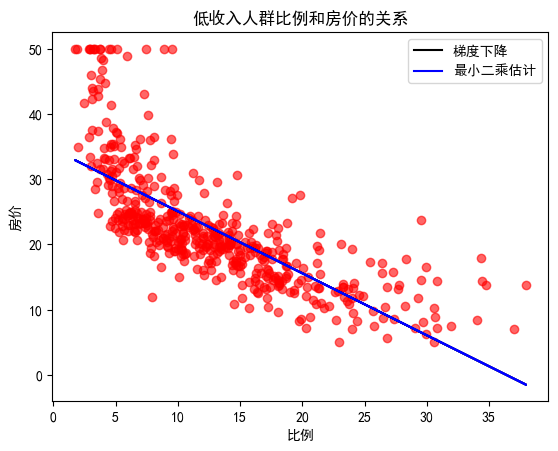

In [14]:
fig, ax = plt.subplots()
ax.scatter(x_3, y, color='red',  alpha=0.6)
ax.plot(x_3, w_final*x_3+b_final, color='black', label='梯度下降')
ax.plot(x_3, wi*x_3+bi, color='blue', label='最小二乘估计')
ax.legend()
ax.set_title('低收入人群比例和房价的关系')
ax.set_xlabel('比例')
ax.set_ylabel('房价')
plt.show()

## 由此基本可得到
- 房间数越多房价越高
- 与就业中心越远房价越高
- 低收入人群比例越低房价越高